<a href="https://colab.research.google.com/github/chinmay002/AV_Janatha_Hackathon/blob/master/predict_the_number_of_likes_for_each_video_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
#
pd.set_option('display.max_colwidth', 25)

import warnings
warnings.simplefilter('ignore')

In [ ]:
df=pd.read_csv('/content/drive/My Drive/train.csv')
df_test=pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
print(f'trian shape {df.shape} --- test shape{df_test.shape}')

trian shape (26061, 12) --- test shape(11170, 11)


In [ ]:
df.isnull().sum()

video_id         0
title            0
channel_title    0
category_id      0
publish_date     0
tags             0
views            0
dislikes         0
comment_count    0
description      0
country_code     0
likes            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
video_id         26061 non-null int64
title            26061 non-null object
channel_title    26061 non-null object
category_id      26061 non-null float64
publish_date     26061 non-null object
tags             26061 non-null object
views            26061 non-null float64
dislikes         26061 non-null float64
comment_count    26061 non-null float64
description      26061 non-null object
country_code     26061 non-null object
likes            26061 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


In [ ]:
df.head()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah ...",351430.0,298.0,900.0,Alif Allah Aur Insaan...,CA,2351.0
1,51040,It's Showtime Miss Q ...,ABS-CBN Entertainment,24.0,2018-03-08,ABS-CBN Entertainment...,461508.0,74.0,314.0,Vice Ganda notices Be...,CA,3264.0
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ...,SANDALWOOD REVIEWS,24.0,2018-03-26,challenging star dars...,40205.0,150.0,100.0,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ...,IN,580.0
3,22618,Havana - swing cover ...,doddleoddle,10.0,2018-02-21,"havana|""cover""|""a cap...",509726.0,847.0,4536.0,Hi hi hi! here's our ...,GB,82773.0
4,74074,MUMMY NE NI KEHTA - 2...,Dude Seriously,23.0,2018-05-10,"dude|""seriously""|""fri...",74311.0,69.0,161.0,BOOK YOUR TICKETS HER...,IN,3557.0


In [ ]:
for col  in df.select_dtypes(include=object).columns:
    print(f'{col} {df[col].nunique()}')

title 26005
channel_title 5764
publish_date 348
tags 21462
description 23426
country_code 4


In [ ]:
#Lets generate hypothesis
1> country code affects likes
2> increasein views increase in likes
3>coment and dislikes will  be less compared to likes
4>like is affected by category id

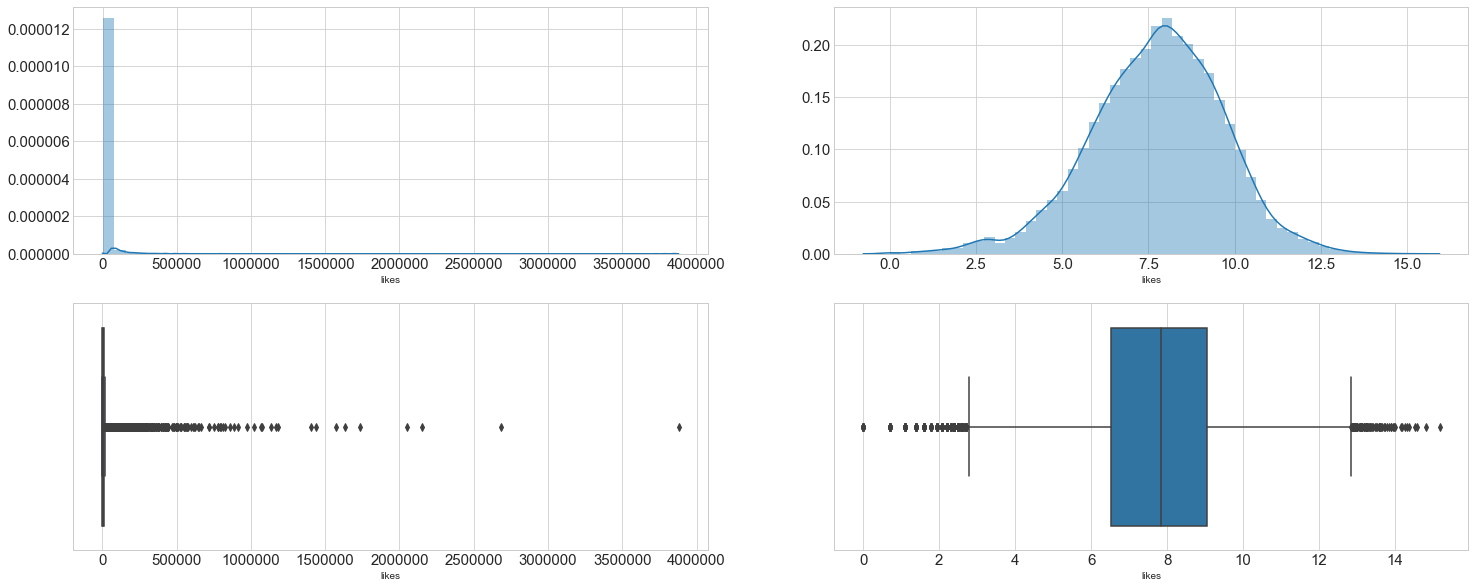

In [ ]:
import seaborn as sns
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc()
#distribution of target 
fig,ax=plt.subplots(2,2,figsize=(25,10))
sns.distplot(df['likes'],ax=ax[0,0])
sns.distplot(np.log(df['likes']+1),ax=ax[0,1])
sns.boxplot(df['likes'],ax=ax[1,0])
sns.boxplot(np.log(df['likes']+1),ax=ax[1,1])

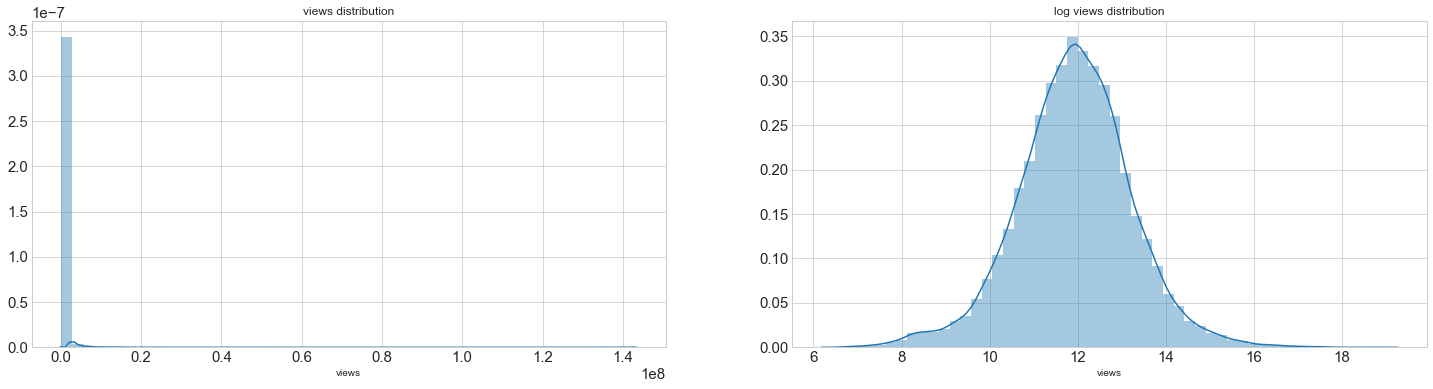

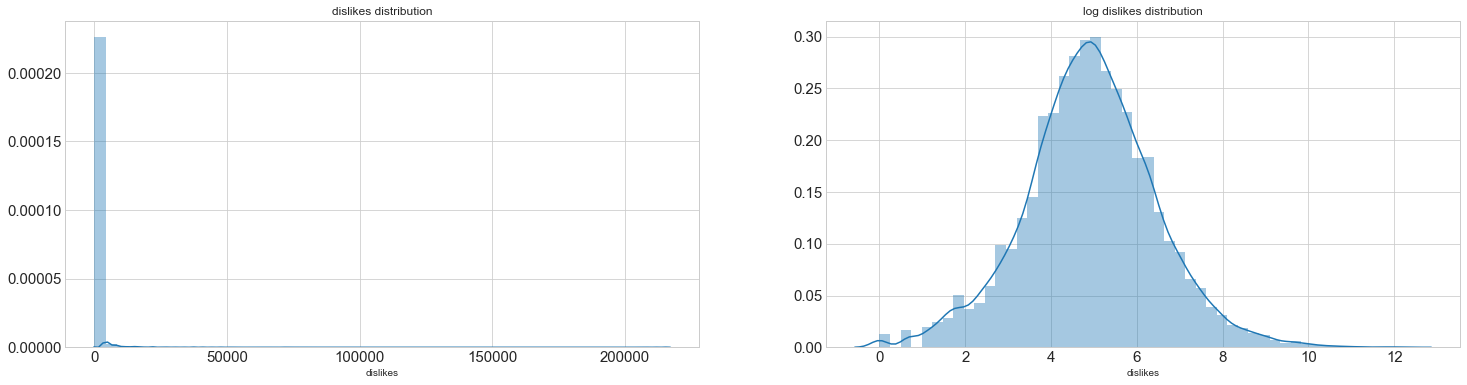

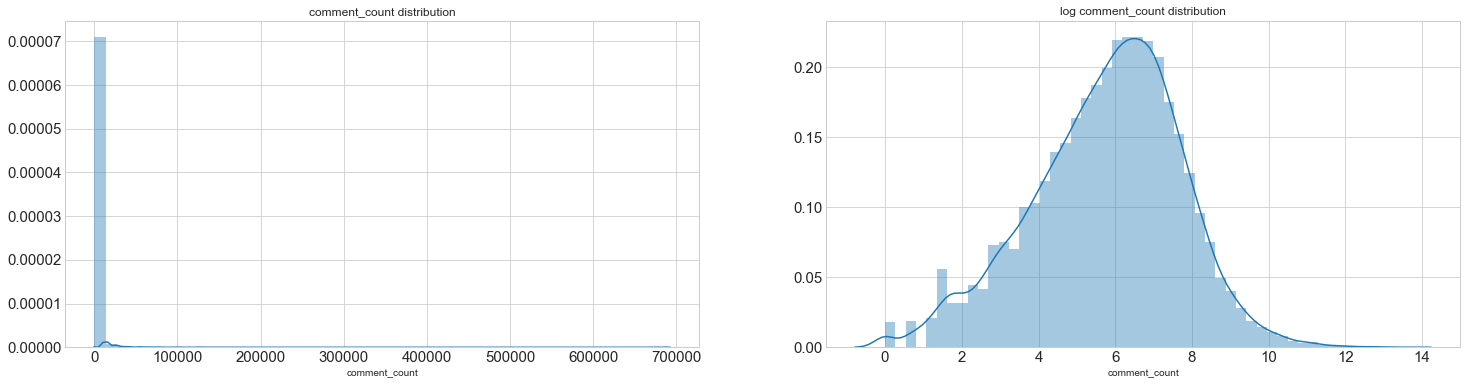

In [ ]:
num_cols=['views','dislikes','comment_count']
#fig,ax=plt.subplots(1,2,figsize=(25,10))
for col in num_cols:
    fig,ax=plt.subplots(1,2,figsize=(25,6))
    sns.distplot(df[col],ax=ax[0]).set_title(f'{col} distribution')
    sns.distplot(np.log(df[col]+1),ax=ax[1]).set_title(f'log {col} distribution')
    fig.show()

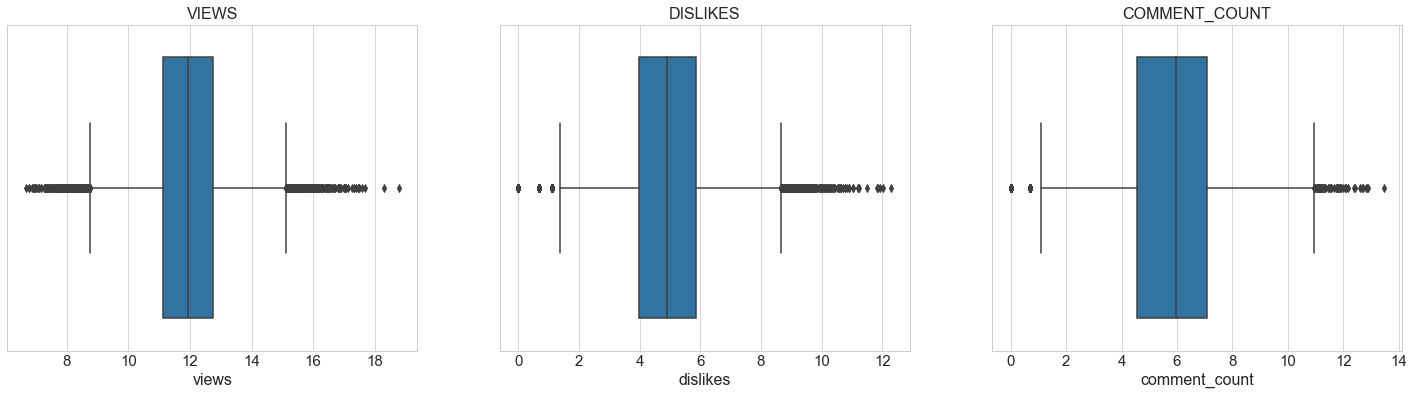

In [ ]:
num_cols=['views','dislikes','comment_count']
#fig,ax=plt.subplots(1,2,figsize=(25,10))
fig,ax=plt.subplots(1,3,figsize=(25,6))
sns.boxplot(np.log(df['views']+1),ax=ax[0]).set_title('VIEWS')
sns.boxplot(np.log(df['dislikes']+1),ax=ax[1]).set_title('DISLIKES')
sns.boxplot(np.log(df['comment_count']+1),ax=ax[2]).set_title('COMMENT_COUNT')
fig.show()
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

In [ ]:
df['views']=np.log(df['views']+1)
df['dislikes']=np.log(df['dislikes']+1)
df['comment_count']=np.log(df['comment_count']+1)
df['likes']=np.log(df['likes']+1)
df_test['views']=np.log(df_test['views']+1)
df_test['dislikes']=np.log(df_test['dislikes']+1)
df_test['comment_count']=np.log(df_test['comment_count']+1)
#df['likes']=np.log(df['likes']+1)

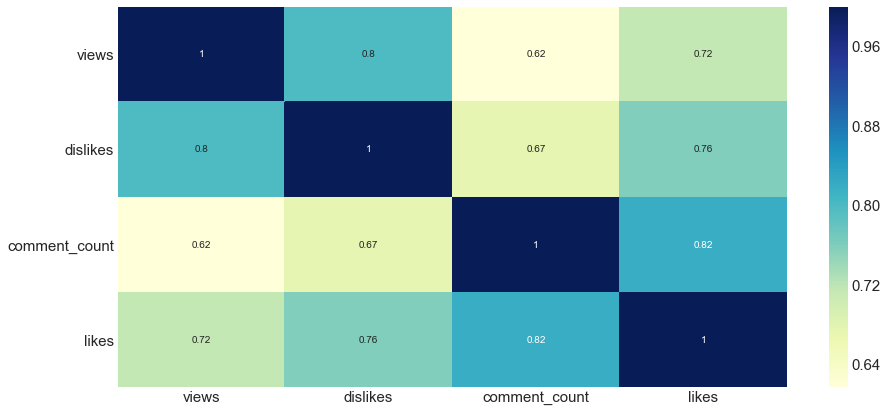

In [ ]:
#BIVARIATE ANALYSIS

plt.figure(figsize=(15,7))
sns.heatmap(df.iloc[:,4:].corr(),annot=True,cmap='YlGnBu',)

<Figure size 1800x720 with 0 Axes>

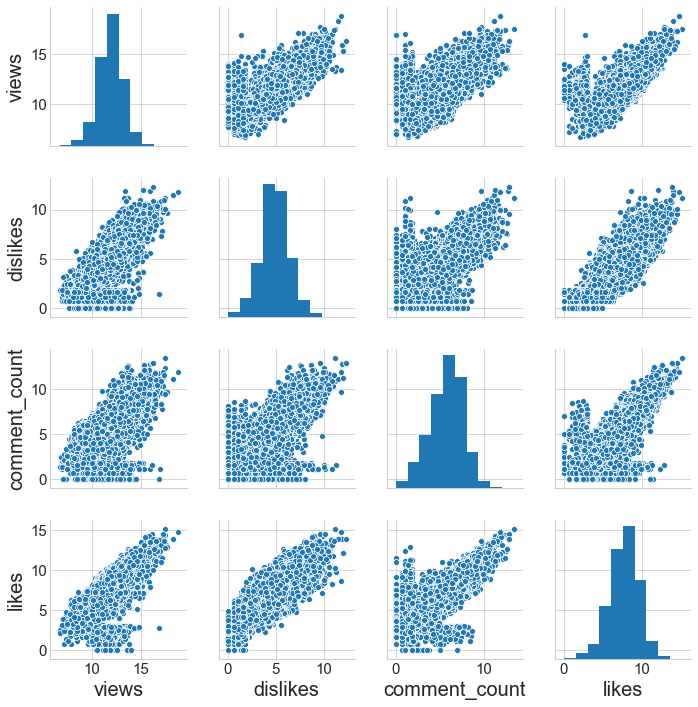

In [ ]:
plt.figure(figsize=(25,10))
sns.pairplot(df[['views','dislikes','comment_count','likes']],)

In [ ]:
#we can see that views dislikes comment have linear relation with likes

In [ ]:
df_cols=df.select_dtypes(include=object).columns
df_cols

Index(['title', 'channel_title', 'publish_date', 'tags', 'description',
       'country_code'],
      dtype='object')

In [ ]:
import plotly.express  as   px
import plotly.graph_objs as go


In [ ]:
cc=df['country_code'].value_counts()
px.pie(df,names=cc.index.tolist(),values=cc.values.tolist(),title='% of video published wrt to  country')
#almost 80% of videos arepublished from  india and canada

In [ ]:
cc=df['category_id'].value_counts()
px.pie(df,names=cc.index.tolist(),values=cc.values.tolist(),title='type  of video  catgeory  %')
#40% of video  belong to category 24

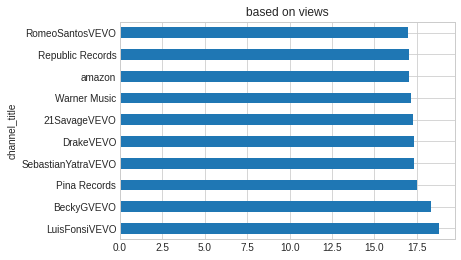

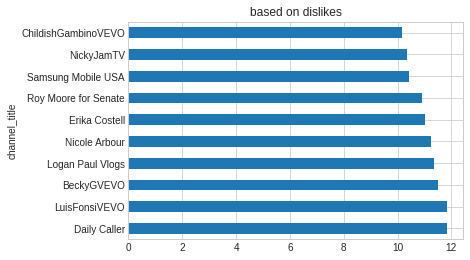

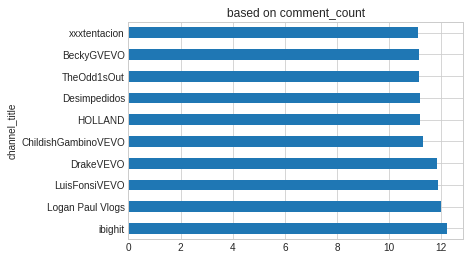

In [ ]:
#likes based on channel_Title
for col  in ['views','dislikes','comment_count']:
    df.groupby('channel_title')[col].mean().sort_values(ascending=False)[:10].plot(kind='barh').set_title(f'based on {col}')
    plt.show()

In [ ]:
ci=df.groupby(['category_id'])['likes'].mean().sort_values(ascending=False)
names=ci.index.tolist()
values=ci.values.tolist()

px.pie(names=names,values=values).update_traces(textposition='inside', textinfo='percent+label')

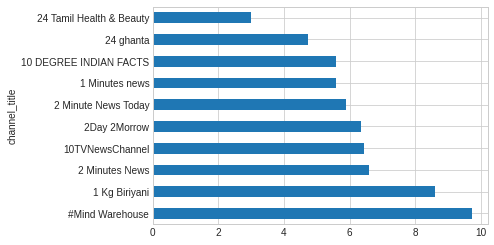

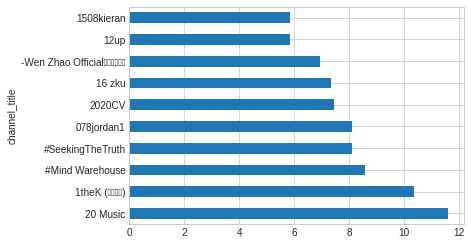

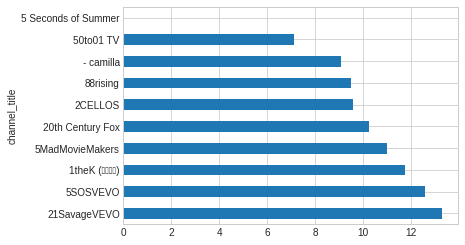

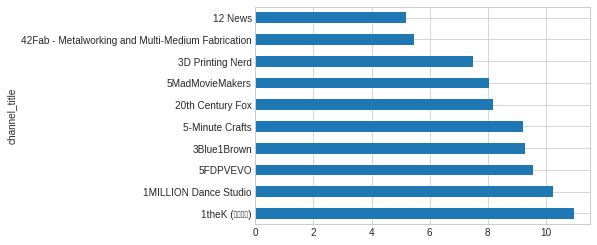

In [ ]:
#let us analyse which from each country which channel has more likes
for country in ['IN','CA','GB','US']:
    df[df['country_code']==country].groupby('channel_title')['likes'].mean()[:10].sort_values(ascending=False).plot(kind='barh')
    plt.show()

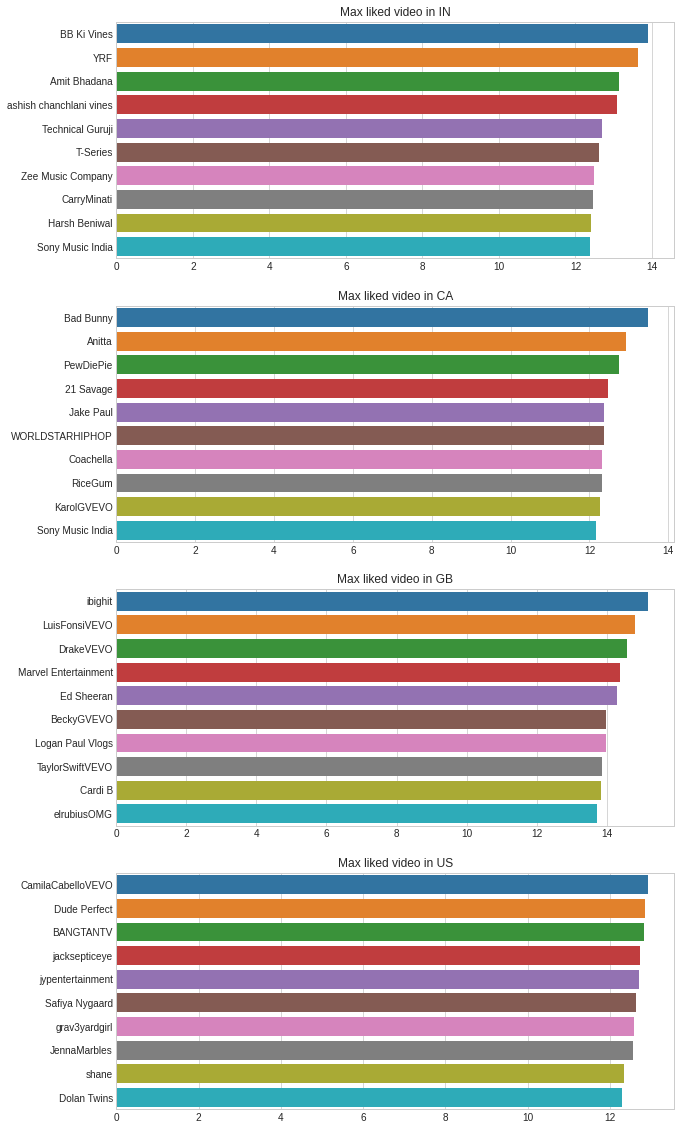

In [ ]:
fig,ax=plt.subplots(4,1,figsize=(10,20))
import seaborn as sns
for i,c in enumerate(['IN','CA','GB','US']) :
    a=df[df['country_code']==c].groupby('channel_title')['likes'].max().sort_values(ascending=False)[:10]
    sns.barplot(y=a.index.tolist(),x=a.values.tolist(),ax=ax[i]).set_title(f'Max liked video in {c}')
    fig.show()

In [ ]:
'''
import plotly.figure_factory as ff
ind=df[df['country_code']=='IN']['likes'].values
ca=df[df['country_code']=='CA']['likes'].values
gb=df[df['country_code']=='GB']['likes'].values
us=df[df['country_code']=='US']['likes'].values

hist_data=[ind,us,gb,ca]
group_labels = ['IN','US','CA','GB']
ff.create_distplot(hist_data, group_labels, bin_size=.2)
'''

"\nimport plotly.figure_factory as ff\nind=df[df['country_code']=='IN']['likes'].values\nca=df[df['country_code']=='CA']['likes'].values\ngb=df[df['country_code']=='GB']['likes'].values\nus=df[df['country_code']=='US']['likes'].values\n\nhist_data=[ind,us,gb,ca]\ngroup_labels = ['IN','US','CA','GB']\nff.create_distplot(hist_data, group_labels, bin_size=.2)\n"

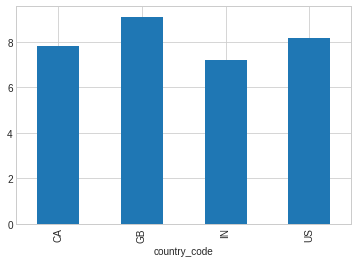

In [ ]:
df.groupby('country_code')['likes'].mean().plot(kind='bar')
#Great britan has high mean likes compared to other

In [ ]:
#Posted date

df['publish_date']=pd.to_datetime(df['publish_date'])
df_test['publish_date']=pd.to_datetime(df_test['publish_date'])

In [ ]:
df['year']=df['publish_date'].dt.year
df['month']=df['publish_date'].dt.month
df['day']=df['publish_date'].dt.day
df_test['year']=df_test['publish_date'].dt.year
df_test['month']=df_test['publish_date'].dt.month
df_test['day']=df_test['publish_date'].dt.day

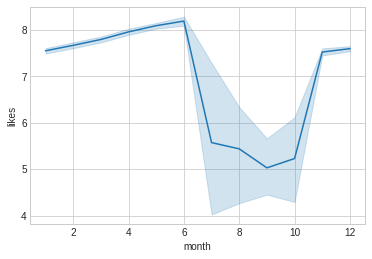

In [ ]:
sns.lineplot(df['month'],df['likes'])

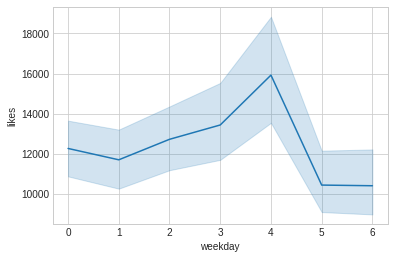

In [ ]:
import seaborn as sns
df['weekday']=df['publish_date'].dt.dayofweek
df_test['weekday']=df_test['publish_date'].dt.dayofweek
sns.lineplot(df['weekday'],df['likes'])

#we can see that mean likes increases in mideweek ie tuesday,wednesday,thursday

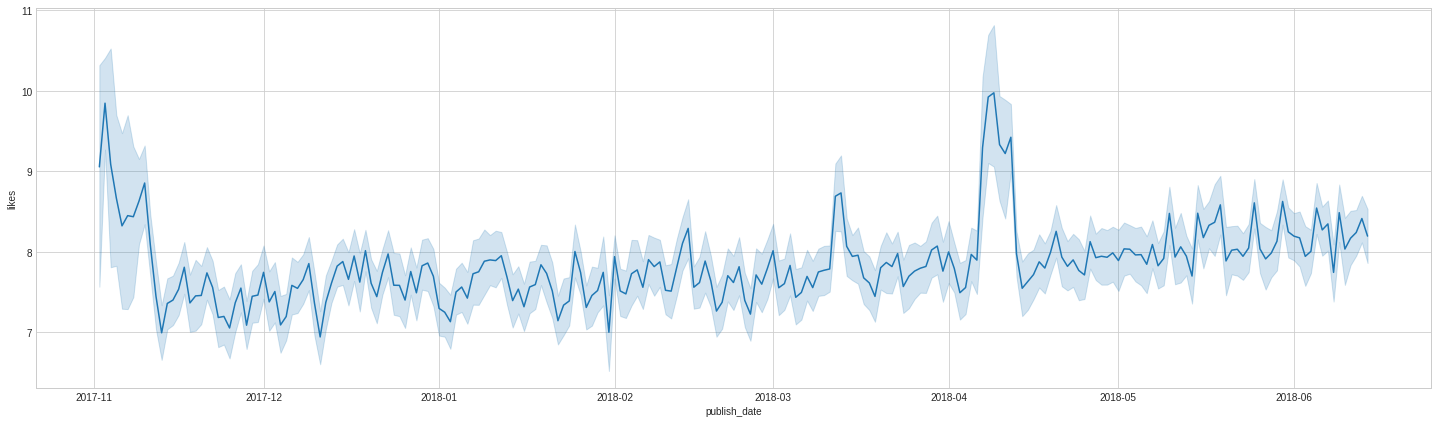

In [ ]:
plt.figure(figsize=(25,7))
sns.lineplot(df[df['publish_date']>'2017-11']['publish_date'],y=df[df['publish_date']>'2017-11']['likes'])

Text(0, 0.5, 'No_of_videos')

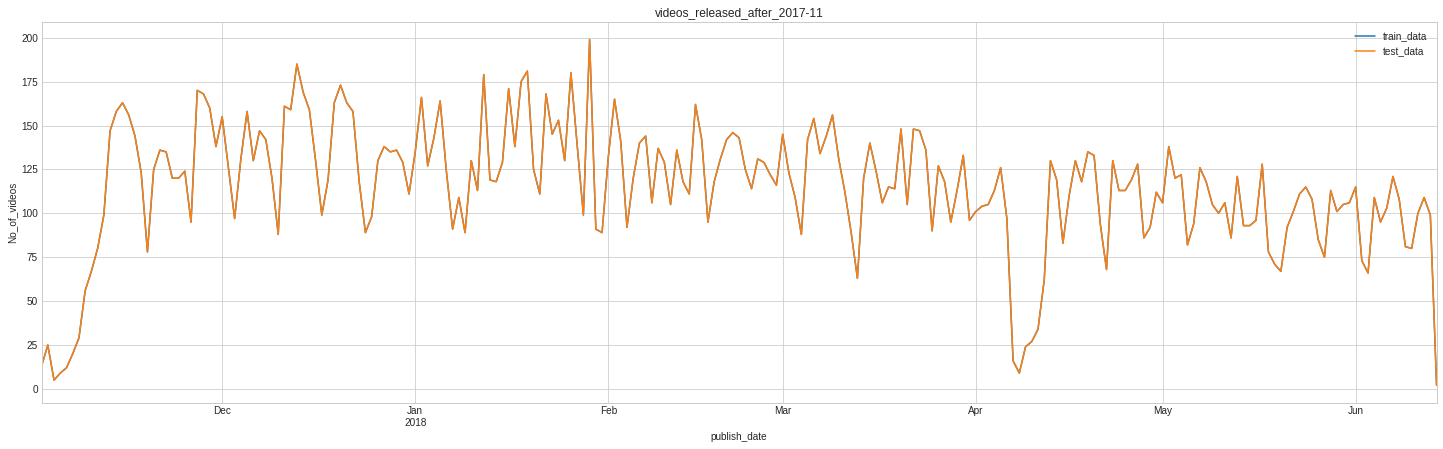

In [ ]:
plt.figure(figsize=(25,7))
df[df['publish_date']>'2017-11'].groupby('publish_date').size().plot(kind='line',label='train_data').set_title('videos_released_after_2017-11')

df_test[df_test['publish_date']>'2017-11'].groupby('publish_date').size().plot(kind='line',label='test_data').set_title('videos_released_after_2017-11')
plt.legend()
plt.ylabel('No_of_videos')

Text(0.5, 1.0, 'videos_released_per_year_wrt_Counrty')

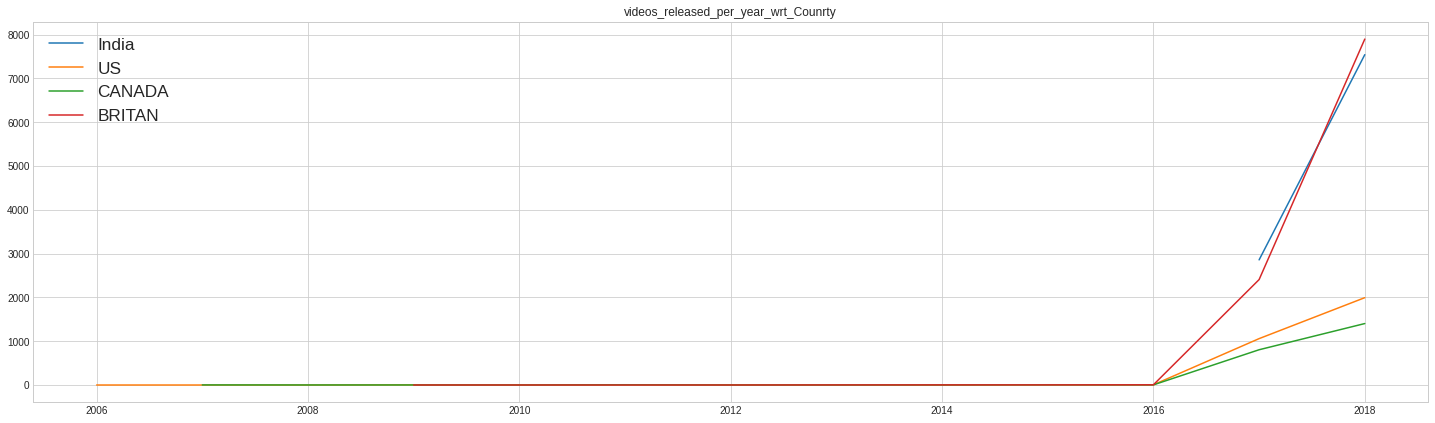

In [ ]:
plt.figure(figsize=(25,7))
ind=df[df['country_code']=='IN']['year'].value_counts()
usa=df[df['country_code']=='US']['year'].value_counts()
gb=df[df['country_code']=='GB']['year'].value_counts()
ca=df[df['country_code']=='CA']['year'].value_counts()
sns.lineplot(ind.index.tolist(),ind.values.tolist(),label='India',ci=None)
sns.lineplot(usa.index.tolist(),usa.values.tolist(),label='US')
sns.lineplot(gb.index.tolist(),gb.values.tolist(),label='CANADA')
sns.lineplot(ca.index.tolist(),ca.values.tolist(),label='BRITAN')
plt.legend(fontsize ='xx-large')
plt.title('videos_released_per_year_wrt_Counrty')

In [ ]:
#compared to canada and us ,india and britian saw exponential rise in videos published

2018    7543
2017    2858
Name: year, dtype: int64

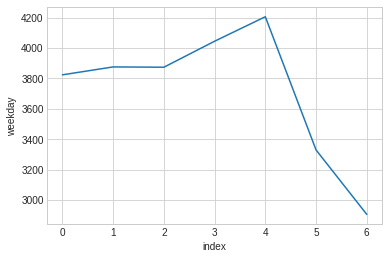

In [ ]:
nw= df['weekday'].value_counts().sort_index().reset_index()

sns.lineplot(x=nw['index'],y=nw['weekday'])

#videos published on Friday are high whereas saturday and sunday was very low

In [ ]:
text_col=['title','channel_title','description','tags']

#assumption is len of text columns matters for likes
def length(col):
    df[col+'_len']=df[col].apply(lambda x:len(x))
    df_test[col+'_len']=df_test[col].apply(lambda x:len(x))

for col in text_col:
    length(col)

In [ ]:
df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes', 'year', 'month', 'day', 'weekday', 'title_len',
       'channel_title_len', 'description_len', 'tags_len'],
      dtype='object')

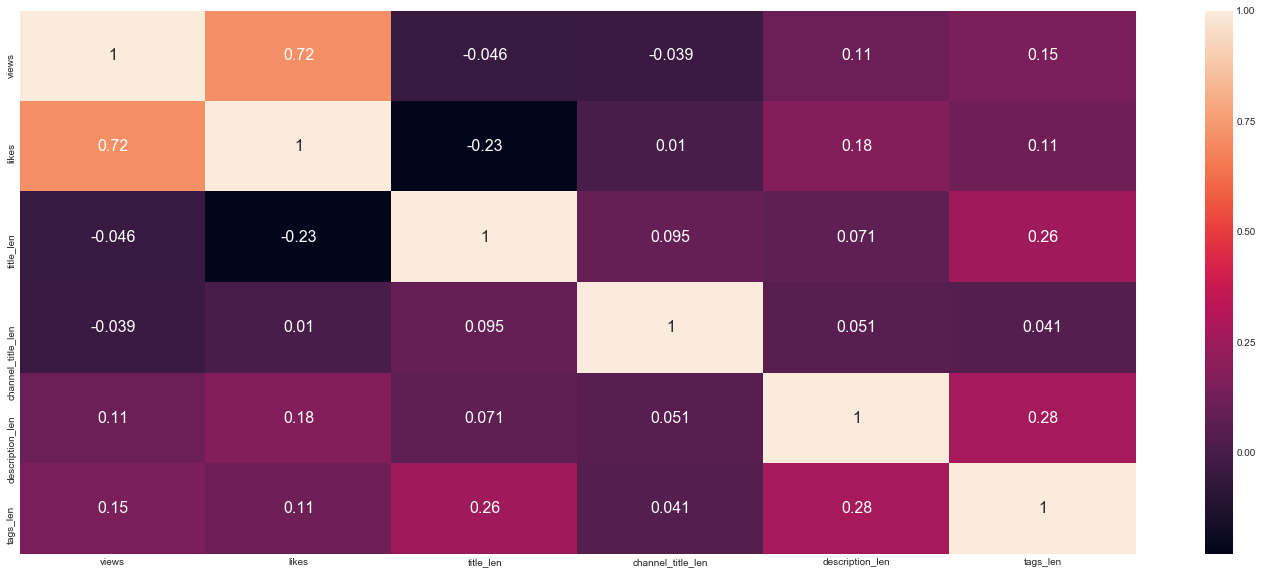

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df[['views' ,'likes' ,'title_len','channel_title_len', 'description_len', 'tags_len']].corr(),annot=True,annot_kws={"size":16})

#there is little neg corr with title_len and positive cor with description -Len

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, ElasticNet

from lightgbm import LGBMRegressor

from xgboost import XGBRegressor


In [ ]:
ss = pd.read_csv('/content/drive/My Drive/sample_submission.csv')
train = pd.read_csv('/content/drive/My Drive/train.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')
ID_COL, TARGET_COL = 'video_id', 'likes'

num_cols = ['views', 'dislikes', 'comment_count']
cat_cols = ['category_id', 'country_code']
text_cols = ['title', 'channel_title', 'tags', 'description']
date_cols = ['publish_date']

def download_preds(preds_test, file_name):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

In [ ]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df = pd.get_dummies(df, columns = cat_cols)

df[num_cols + ['likes']] = df[num_cols + ['likes']].apply(lambda x: np.log1p(x))

train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

In [ ]:

from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

def av_metric(y_true, y_pred):
  return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

trn, val = train_test_split(train_proc, test_size=0.2, random_state = 1)

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
X_test = test_proc[features]

features = [c for c in X_trn.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in text_cols + date_cols]  

In [ ]:
cat_num_cols

['views',
 'dislikes',
 'comment_count',
 'category_id_1.0',
 'category_id_2.0',
 'category_id_10.0',
 'category_id_15.0',
 'category_id_17.0',
 'category_id_19.0',
 'category_id_20.0',
 'category_id_22.0',
 'category_id_23.0',
 'category_id_24.0',
 'category_id_25.0',
 'category_id_26.0',
 'category_id_27.0',
 'category_id_28.0',
 'category_id_29.0',
 'category_id_30.0',
 'category_id_43.0',
 'country_code_CA',
 'country_code_GB',
 'country_code_IN',
 'country_code_US']

In [ ]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = av_metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = av_metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  return oofs, preds

  

In [ ]:
dt_params = {'max_depth': 12,
 'max_features': 0.8,
 'max_leaf_nodes': 128,
 'min_samples_split': 2}

clf = DecisionTreeRegressor(**dt_params)
        

dt_oofs, dt_preds = run_clf_kfold(clf, train_proc, test_proc, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 772.8667094927591

------------- Fold 2 -------------

AV metric score for validation set is 765.9032395282447

------------- Fold 3 -------------

AV metric score for validation set is 766.0530857700235

------------- Fold 4 -------------

AV metric score for validation set is 750.950163906157

------------- Fold 5 -------------

AV metric score for validation set is 763.6080861301234


AV metric for oofs is 763.9102240323432


In [ ]:
from lightgbm import LGBMRegressor
clf = LGBMRegressor()
lgb_oofs, lgb_preds = run_clf_kfold(clf, train_proc, test_proc, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 674.7737515393275

------------- Fold 2 -------------

AV metric score for validation set is 678.3212622895253

------------- Fold 3 -------------

AV metric score for validation set is 669.5119539218649

------------- Fold 4 -------------

AV metric score for validation set is 665.6236530707358

------------- Fold 5 -------------

AV metric score for validation set is 671.8950668383243


AV metric for oofs is 672.0393057033824


In [ ]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'hacklive_lgb_5_folds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.688058
[200]	valid_0's rmse: 0.673056
[300]	valid_0's rmse: 0.668448
[400]	valid_0's rmse: 0.666901
[500]	valid_0's rmse: 0.666187
[600]	valid_0's rmse: 0.666155
[700]	valid_0's rmse: 0.665891
[800]	valid_0's rmse: 0.666161
Early stopping, best iteration is:
[733]	valid_0's rmse: 0.665611

AV metric score for validation set is 665.6109435506439

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.689594
[200]	valid_0's rmse: 0.676902
[300]	valid_0's rmse: 0.673678
[400]	valid_0's rmse: 0.672131
[500]	valid_0's rmse: 0.672627
Early stopping, best iteration is:
[406]	valid_0's rmse: 0.672039

AV metric score for validation set is 672.0387821770701

------------- Fold 3 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.684084
[200]	valid_0's rmse: 0

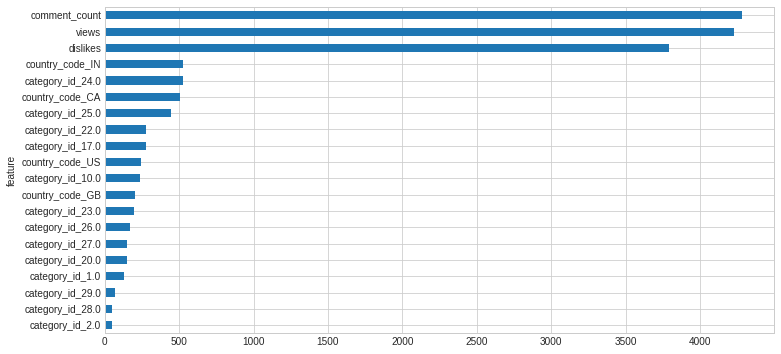

In [ ]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train_proc))
  preds = np.zeros((len(test_proc)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  feature_importances = pd.DataFrame()

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': clf.feature_importances_})
    feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = av_metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = av_metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  feature_importances = feature_importances.reset_index(drop = True)
  fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
  fi.plot(kind = 'barh', figsize=(12, 6))

  return oofs, preds, fi


clf = LGBMRegressor(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)


------------- Fold 1 -------------
[10:17:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.13914
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.675344
[400]	validation_0-rmse:0.668702
[600]	validation_0-rmse:0.666931
[800]	validation_0-rmse:0.666898
Stopping. Best iteration:
[736]	validation_0-rmse:0.666675


AV metric score for validation set is 666.6752519026531

------------- Fold 2 -------------
[10:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.12698
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.687736
[400]	validation_0-rmse:0.680454
[600]	validation_0-rmse:0.679159
[800]	validation_0-rmse:0.678962
Stopping. Best iteration:
[790]	validation_0-rmse:0.678721


AV metric score for validation set is 67

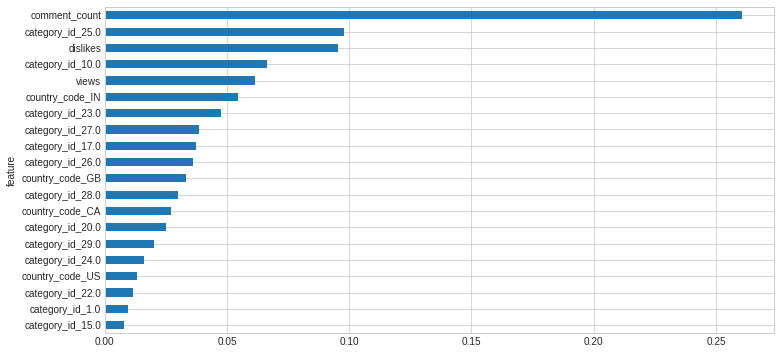

In [ ]:
from xgboost import XGBRegressor

clf = XGBRegressor(n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=1452,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)


In [ ]:
#Feature_Engeneering

In [ ]:
def join_df(train, test):

  df = pd.concat([train, test], axis=0).reset_index(drop = True)
  features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
  df[num_cols + ['likes']] = df[num_cols + ['likes']].apply(lambda x: np.log1p(x))

  return df, features

def split_df_and_get_features(df, train_nrows):

  train, test = df[:train_nrows].reset_index(drop = True), df[train_nrows:].reset_index(drop = True)
  features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
  
  return train, test, features

In [ ]:
df, features = join_df(train, test)

In [ ]:
features

['title',
 'channel_title',
 'category_id',
 'publish_date',
 'tags',
 'views',
 'dislikes',
 'comment_count',
 'description',
 'country_code']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37231 entries, 0 to 37230
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       37231 non-null  int64  
 1   title          37231 non-null  object 
 2   channel_title  37231 non-null  object 
 3   category_id    37231 non-null  object 
 4   publish_date   37231 non-null  object 
 5   tags           37231 non-null  object 
 6   views          37231 non-null  float64
 7   dislikes       37231 non-null  float64
 8   comment_count  37231 non-null  float64
 9   description    37231 non-null  object 
 10  country_code   37231 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 3.4+ MB


In [ ]:
cat_cols=['category_id', 'country_code', 'channel_title']
df[cat_cols] = df[cat_cols].apply(lambda x: pd.factorize(x)[0])

In [ ]:
df['publish_date']=pd.to_datetime(df['publish_date'])
df['publish_year']=df['publish_date'].dt.year
df['publlish_month']=df['publish_date'].dt.month
df['publish_weekday']=df['publish_date'].dt.dayofweek

In [ ]:
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [ ]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.631476
[600]	valid_0's rmse: 0.611708
[900]	valid_0's rmse: 0.602731
[1200]	valid_0's rmse: 0.598132
[1500]	valid_0's rmse: 0.594867
[1800]	valid_0's rmse: 0.592844
[2100]	valid_0's rmse: 0.59117
[2400]	valid_0's rmse: 0.590021
[2700]	valid_0's rmse: 0.589543
[3000]	valid_0's rmse: 0.589345
[3300]	valid_0's rmse: 0.58922
Early stopping, best iteration is:
[3191]	valid_0's rmse: 0.588805

AV metric score for validation set is 588.8048970129312

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.640332
[600]	valid_0's rmse: 0.619169
[900]	valid_0's rmse: 0.611688
[1200]	valid_0's rmse: 0.607518
[1500]	valid_0's rmse: 0.604714
[1800]	valid_0's rmse: 0.602461
[2100]	valid_0's rmse: 0.601161
[2400]	valid_0's rmse: 0.60065
Early stopping, best iteration is:
[2276]	valid_0's rmse: 0.600446

AV metric s

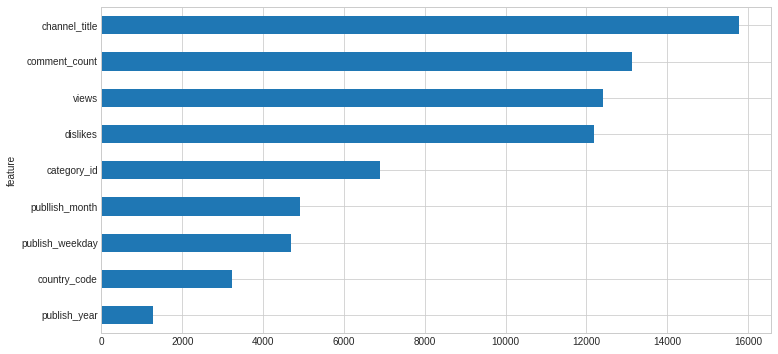

In [ ]:
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.65,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)


In [ ]:
lgb_preds = np.expm1(lgb_preds)
download_preds(lgb_preds, file_name = 'lgb_feat_eng.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

#Bag of Words Approach for Text Based Features

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
TOP_N_WORDS = 50

vec = CountVectorizer(max_features = TOP_N_WORDS)
txt_to_fts = vec.fit_transform(df['description']).toarray()
txt_to_fts.shape

(37231, 50)

In [ ]:
txt_to_fts[0]

array([0, 3, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 0,
       1, 1, 2, 0, 0, 2])

In [ ]:
c = 'description'
txt_fts_names = [c + f'_word_{i}_count' for i in range(TOP_N_WORDS)]
df[txt_fts_names] = txt_to_fts



------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.57529
[600]	valid_0's rmse: 0.551352
[900]	valid_0's rmse: 0.539454
[1200]	valid_0's rmse: 0.531573
[1500]	valid_0's rmse: 0.527136
[1800]	valid_0's rmse: 0.524009
[2100]	valid_0's rmse: 0.521425
[2400]	valid_0's rmse: 0.519743
[2700]	valid_0's rmse: 0.517998
[3000]	valid_0's rmse: 0.51711
[3300]	valid_0's rmse: 0.516535
[3600]	valid_0's rmse: 0.516183
[3900]	valid_0's rmse: 0.515986
[4200]	valid_0's rmse: 0.515845
[4500]	valid_0's rmse: 0.515376
[4800]	valid_0's rmse: 0.514989
Did not meet early stopping. Best iteration is:
[5000]	valid_0's rmse: 0.51484

AV metric score for validation set is 514.8401479817129

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.577557
[600]	valid_0's rmse: 0.555078
[900]	valid_0's rmse: 0.542773
[1200]	valid_0's rmse: 0.536105
[1500]	valid_0's rmse: 0.531459
[1

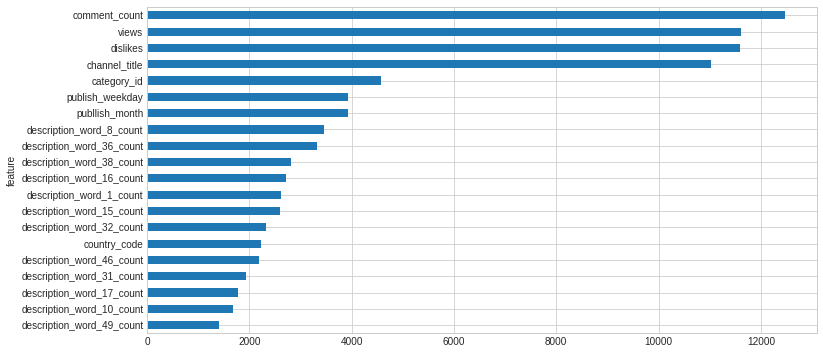

In [ ]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.65,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [ ]:
lgb_preds = np.expm1(lgb_preds)
download_preds(lgb_preds, file_name = 'lgb_text_as_feat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Ggrouping


In [ ]:
df.groupby('channel_title')['country_code'].

0        2
1        1
2        1
3        1
4        1
        ..
37226    2
37227    1
37228    1
37229    2
37230    1
Name: country_code, Length: 37231, dtype: int64

In [ ]:
df['unique_channel_in_country']=df.groupby('channel_title')['country_code'].transform('nunique')

In [ ]:
df['channel_title_mean_views'] = df.groupby('channel_title')['views'].transform('mean')
df['channel_title_max_views'] = df.groupby('channel_title')['views'].transform('max')
df['channel_title_min_views'] = df.groupby('channel_title')['views'].transform('min')

df['channel_title_mean_comments'] = df.groupby('channel_title')['comment_count'].transform('mean')
df['channel_title_max_comments'] = df.groupby('channel_title')['comment_count'].transform('max')
df['channel_title_min_comments'] = df.groupby('channel_title')['comment_count'].transform('min')

df['channel_title_mean_dislikes'] = df.groupby('channel_title')['dislikes'].transform('mean')
df['channel_title_max_dislikes'] = df.groupby('channel_title')['dislikes'].transform('max')
df['channel_title_min_dislikes'] = df.groupby('channel_title')['dislikes'].transform('min')



------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.530196
[600]	valid_0's rmse: 0.506781
[900]	valid_0's rmse: 0.496448
[1200]	valid_0's rmse: 0.490131
[1500]	valid_0's rmse: 0.486171
[1800]	valid_0's rmse: 0.48345
[2100]	valid_0's rmse: 0.481618
[2400]	valid_0's rmse: 0.480408
[2700]	valid_0's rmse: 0.479496
[3000]	valid_0's rmse: 0.478692
[3300]	valid_0's rmse: 0.478237
[3600]	valid_0's rmse: 0.47768
[3900]	valid_0's rmse: 0.477387
[4200]	valid_0's rmse: 0.47729
Early stopping, best iteration is:
[4095]	valid_0's rmse: 0.477138

AV metric score for validation set is 477.1378475679486

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.53098
[600]	valid_0's rmse: 0.507333
[900]	valid_0's rmse: 0.49824
[1200]	valid_0's rmse: 0.493143
[1500]	valid_0's rmse: 0.490011
[1800]	valid_0's rmse: 0.487262
[2100]	valid_0's rmse: 0.485749
[2400]	valid_0's 

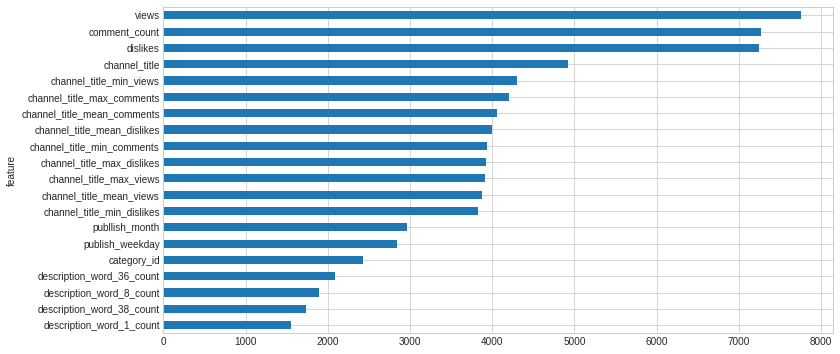

In [ ]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]
clf = LGBMRegressor(n_estimators = 5000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.65,
                        metric = 'None',
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [ ]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'mean_max_views.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>